In [2]:
# Python 3 compatability
from __future__ import division, print_function
from builtins import range

# system functions that are always useful to have
import time, sys, os

# basic numeric setup
import numpy as np
import math
from numpy import linalg
from scipy.interpolate import interp1d, RegularGridInterpolator

# inline plotting
%matplotlib inline

# plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sea
# seed the random number generator
np.random.seed(7)

from spec_exam import Gen_spec
from sim_engine import forward_model_grism, Salmon
import fsps
from spec_id import Scale_model

import dynesty
from dynesty import plotting as dyplot
from glob import glob

In [3]:
# re-defining plotting defaults
from matplotlib import rcParams
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'font.size': 20})

In [6]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(0.019/0.019), sfh = 4, tau = 0.1,
                           dust_type = 1)

Gs = Gen_spec('GND', 21156, 1.25378,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500],mdl_err = False, instr_err = False,
            phot_errterm = 0.03, decontam = True)  

# Gs.Make_sim(0.019, 3.2, 0.2 , 1.2, 0)

cleaned


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


In [29]:
sp.params['sfh'] = 3
sp.params['logzsol'] = np.log10( 0.6)
sp.params['dust2'] = 0.1
sp.set_tabular_sfh(np.array([0.1, 0.5, 1, 2, 4, 6]),np.array([0.3,  0.9, 0.8,
         0.3 ,  0.0,  0.1]))

wave,flux = sp.get_spectrum(tage = 4.2,peraa=True)


In [16]:
np.save('../data/sim_spec',[wave,flux])

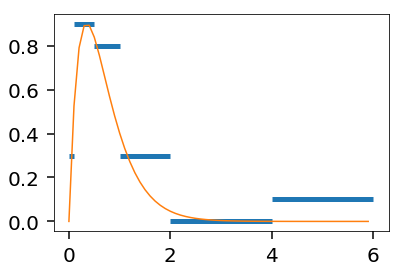

In [28]:
t= np.arange(0,6,.1)
plt.errorbar(np.array([0.1, 0.5, 1, 2, 4, 6]),np.array([0.3,  0.9, 0.8,
         0.3 ,  0.00,  0.1]),xerr = [[0.1,0.4,0.5,1,2,2],[0,0,0,0,0,0]],fmt = 'o',ms=0,linewidth=5)
plt.plot(t,t*np.exp(-t/0.35)*7)

(3, 5)

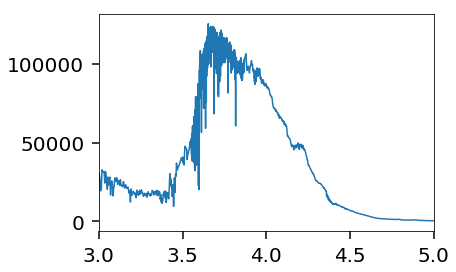

In [19]:
plt.plot(np.log10(wave),flux)
plt.xlim(3,5)

In [8]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(0.019/0.019), sfh = 4, tau = 0.1,
                           dust_type = 1)
Gs.Make_sim(wave,flux,1.25)

([<matplotlib.axis.XTick at 0x1a79bda320>,
 <a list of 6 Text xticklabel objects>)

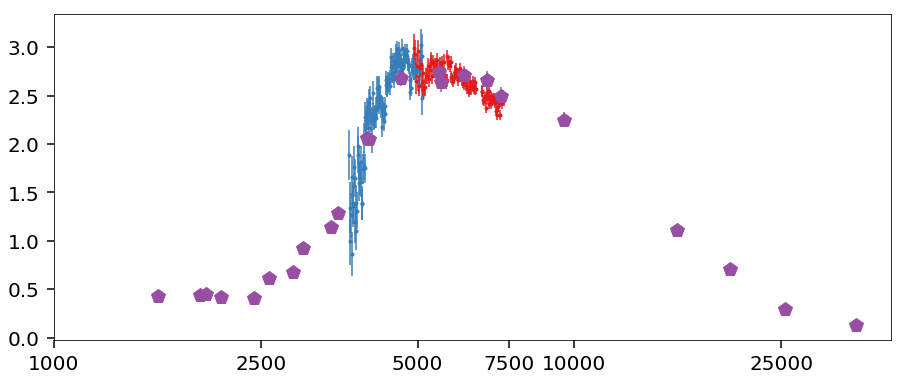

In [8]:
plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.SBfl*1E18,Gs.SBer*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.SRfl*1E18,Gs.SRer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.SPflx*1E18,Gs.SPerr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

([<matplotlib.axis.XTick at 0x1a6e8742e8>,
 <a list of 6 Text xticklabel objects>)

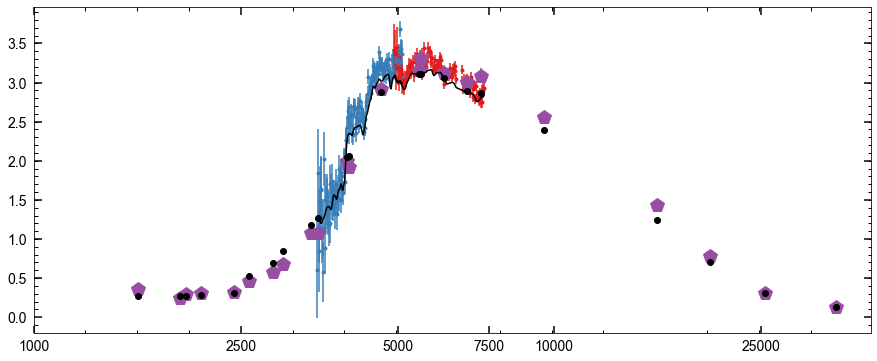

In [6]:
sp.params['logzsol'] = np.log10( 0.328 )
sp.params['tau'] = 0.01
sp.params['dust2'] = 0.2

wave, flux = sp.get_spectrum(tage = 3.21, peraa = True)
sp.params['tau'] = 0.01

wave, flux_b = sp.get_spectrum(tage = 0.01, peraa = True)

# 3.28629085e-01, 3.21741605e+00, 1.09566430e-02, 1.25318107e+00,
#        2.07411413e-01, 3.49182299e-05

Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux + 0.000035 * flux_b, 1.2532)

PC= Full_scale(Gs, Pmfl)

Bchi, Rchi, Pchi = Full_fit(Gs, PC * Bmfl, PC * Rmfl, PC * Pmfl)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18,Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18,Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), PC*Bmfl*1E18, 'k', zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), PC*Rmfl*1E18, 'k', zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), PC*Pmfl*1E18, 'ko', zorder=5)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])


In [7]:
wave,flux = np.load('../data/sim_spec.npy')


In [18]:
wave

array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
       1.000e+08])

In [10]:
# prior transform
specz = 1.25378
bft = 0.545
bfd = 0.2

if bft <= 0.5:
    tau_limit = 0.5
    
if 0.5 < bft <= 1.0:
    tau_limit = 1.0
    
if bft > 1.0:
    tau_limit = 2.0
    
if bfd <= 0.5:
    dust_limit = 0.5
    
if 0.5 < bfd <= 1.0:
    dust_limit = 1.0
    
if bfd > 1.0:
    dust_limit = 2.0

# def prior_transform(u):
#     m = (0.03 * u[0] + 0.001) / 0.019
#     a = 5. * u[1] + 0.1
#     t = tau_limit*u[2] + 0.01
#     z = specz + 0.003 * (2*u[3] - 1)
#     d = dust_limit*u[4]
#     return [m, a, t, z, d]
#     return [m, a, t, z]

def prior_transform(u):
    m = (0.03 * u[0] + 0.001) / 0.019
#     a = 10. * u[1] + 0.1
    a = 5. * u[1] + 0.1
    t = 3*u[2] + 0.01
    z = 2.5*u[3]
    d = 2*u[4]


#     t1 = u[2]
#     t2 = u[3]
#     t3 = u[4]
#     t4 = u[5]
#     t5 = u[6]
#     t6 = u[7]
#     t7 = u[8]    
#     z = 2.5*u[9]
#     d = 2*u[10]
    

    return [m, a, t, z, d]
#     return [m, a, t1, t2, t3, t4, t5, t6, t7, z, d]

In [11]:
def forward_model_all_beams(beams, trans, in_wv, model_wave, model_flux):
    FL = np.zeros([len(beams),len(in_wv)])

    for i in range(len(beams)):
        mwv, mflx = forward_model_grism(beams[i], model_wave, model_flux)
        FL[i] = interp1d(mwv, mflx)(in_wv)
        FL[i] /= trans[i]

    return np.mean(FL.T,axis=1)


def Full_forward_model(spec, wave, flux, specz):
    Bmfl = forward_model_all_beams(spec.Bbeam, spec.Btrans, spec.Bwv, wave * (1 + specz), flux)
    Rmfl = forward_model_all_beams(spec.Rbeam, spec.Rtrans, spec.Rwv, wave * (1 + specz), flux)
    Pmfl = spec.Sim_phot_mult(wave * (1 + specz),flux)

    return Bmfl, Rmfl, Pmfl

def Full_scale(spec, Pmfl):
    PC = Scale_model(spec.SPflx, spec.SPerr, Pmfl)
    return PC

def Full_fit(spec, Bmfl, Rmfl, Pmfl):

    Bscale = Scale_model(spec.SBfl, spec.SBer, Bmfl)
    Rscale = Scale_model(spec.SRfl, spec.SRer, Rmfl)

    Bchi = np.sum(((((spec.SBfl/ Bscale) - Bmfl) / (spec.SBer / Bscale))**2))
    Rchi = np.sum(((((spec.SRfl/ Rscale) - Rmfl) / (spec.SRer / Rscale))**2))
    Pchi = np.sum((((spec.SPflx - Pmfl) / spec.SPerr)**2))
    
    return Bchi, Rchi, Pchi

def loglikelihood(X):
    m,a,t,z,d= X
#     m, a, t1, t2, t3, t4, t5, t6, t7, z, d = X
    
    sp.params['logzsol'] = np.log10( m )
    sp.params['tau'] = t
    sp.params['dust2'] = d
#     sp.set_tabular_sfh(np.array([ 0.01,0.03, 0.1, 0.33, 1, 3.6, 7]),np.array([t1, t2, t3, t4, t5, t6, t7]))
    wave, flux = sp.get_spectrum(tage = a, peraa = True)
    
    Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux, z)
    
    PC= Full_scale(Gs, Pmfl)

    Bchi, Rchi, Pchi = Full_fit(Gs, PC * Bmfl, PC * Rmfl, PC * Pmfl)
                  
    return -0.5 * (Bchi + Rchi + Pchi)

In [5]:
import ipyparallel as ipp

rc = ipp.Client()
nprocs = len(rc.ids)
print(rc.ids)

dview = rc[:]
dview.use_dill();

class Pool(object):
    """A simple wrapper for `dview`."""
    
    def __init__(self, dview):
        self.dview = dview
        self.size = nprocs
        
    def map(self, function, tasks):
        return self.dview.map_sync(function, tasks)

# define our pool
pool = Pool(dview)

[0, 1, 2, 3]


In [ ]:
%%px

# import environment
import fsps
from spec_exam import Gen_spec
from sim_engine import *
import dynesty
from scipy.interpolate import interp1d, RegularGridInterpolator

specz = 1.25378
bft = 0.545
bfd = 0.2

if bft <= 0.5:
    tau_limit = 0.5
    
if 0.5 < bft <= 1.0:
    tau_limit = 1.0
    
if bft > 1.0:
    tau_limit = 2.0
    
if bfd <= 0.5:
    dust_limit = 0.5
    
if 0.5 < bfd <= 1.0:
    dust_limit = 1.0
    
if bfd > 1.0:
    dust_limit = 2.0
    
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(1), sfh = 4, tau = 0.1,
                           dust_type = 1)


# sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(1), sfh = 3,
#                            dust_type = 1)

Gs = Gen_spec('GND', 21156, 1.25378,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500],mdl_err = False, instr_err = False,
            phot_errterm = 0.03, decontam = True) 

wave,flux = np.load('../data/sim_spec.npy')

Gs.Make_sim(wave,flux,1.25)

def forward_model_all_beams(beams, trans, in_wv, model_wave, model_flux):
    FL = np.zeros([len(beams),len(in_wv)])

    for i in range(len(beams)):
        mwv, mflx = forward_model_grism(beams[i], model_wave, model_flux)
        FL[i] = interp1d(mwv, mflx)(in_wv)
        FL[i] /= trans[i]

    return np.mean(FL.T,axis=1)


def Full_forward_model(spec, wave, flux, specz):
    Bmfl = forward_model_all_beams(spec.Bbeam, spec.Btrans, spec.Bwv, wave * (1 + specz), flux)
    Rmfl = forward_model_all_beams(spec.Rbeam, spec.Rtrans, spec.Rwv, wave * (1 + specz), flux)
    Pmfl = spec.Sim_phot_mult(wave * (1 + specz),flux)

    return Bmfl, Rmfl, Pmfl

def Full_scale(spec, Pmfl):
    PC = Scale_model(spec.SPflx, spec.SPerr, Pmfl)
    return PC

def Full_fit(spec, Bmfl, Rmfl, Pmfl):

    Bscale = Scale_model(spec.SBfl, spec.SBer, Bmfl)
    Rscale = Scale_model(spec.SRfl, spec.SRer, Rmfl)

    Bchi = np.sum(((((spec.SBfl/ Bscale) - Bmfl) / (spec.SBer / Bscale))**2))
    Rchi = np.sum(((((spec.SRfl/ Rscale) - Rmfl) / (spec.SRer / Rscale))**2))
    Pchi = np.sum((((spec.SPflx - Pmfl) / spec.SPerr)**2))
    
    return Bchi, Rchi, Pchi

# seed the random number generator
np.random.seed(os.getpid())
print('Random seed:',os.getpid())

In [12]:
# initialize our nested sampler
dsampler = dynesty.DynamicNestedSampler(loglikelihood, prior_transform, ndim =5, sample = 'rwalk', bound = 'single') 

In [13]:
# sample dynamically from the target distribution
dsampler.run_nested(wt_kwargs={'pfrac': 1.0}, dlogz_init=0.01, print_progress=True)


iter: 25932 | batch: 8 | bound: 1239 | nc: 25 | ncall: 609334 | eff(%):  4.256 | loglstar: -128.540 < -121.696 < -122.813 | logz: -143.315 +/-  0.190 | stop:  0.976            


In [14]:
# save results
dres = dsampler.results

(<Figure size 1152x1152 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a80d149b0>,
       dtype=object))

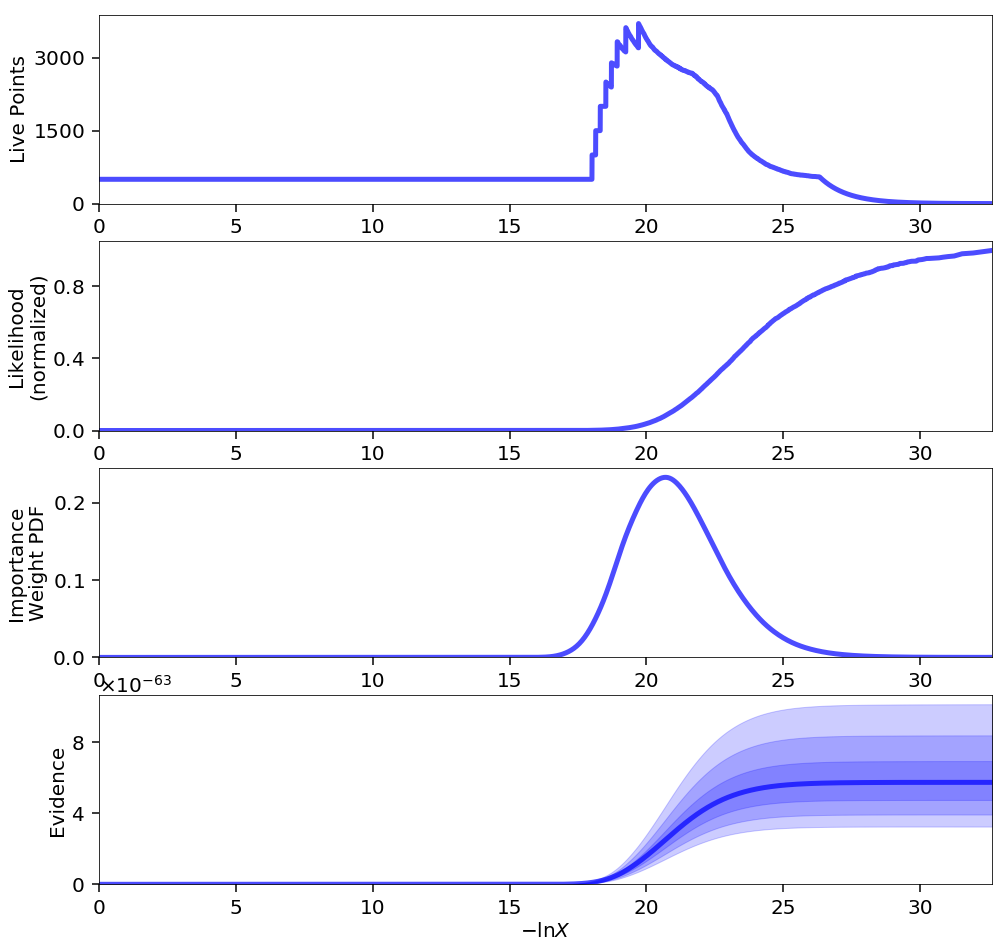

In [15]:
dyplot.runplot(dres)

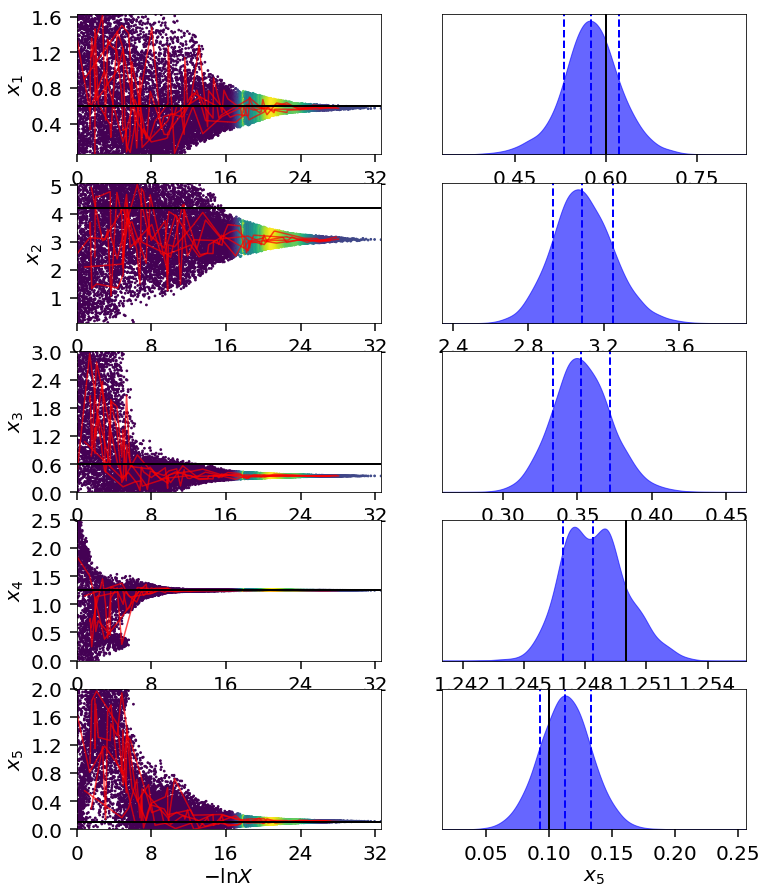

In [18]:
fig, axes = dyplot.traceplot(dres, truths=[.6,4.2,.6,1.25,0.1], truth_color='black',
                             show_titles=False, title_kwargs={'fontsize': 5, 'y': 1.05},
                             trace_cmap='viridis', kde=False,
                             connect=True, connect_highlight=range(5))

(<Figure size 849.6x849.6 with 25 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a845c0ef0>,
       dtype=object))

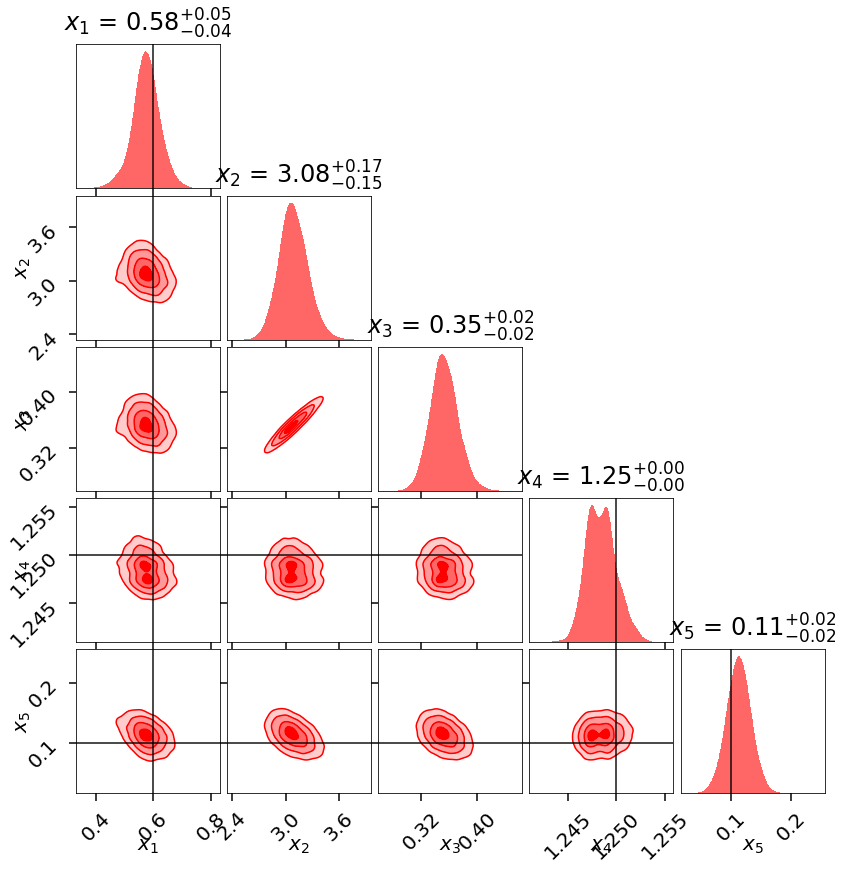

In [20]:
dyplot.cornerplot(dres, color='red', truths=[.6,4.2,.6,1.25,0.1], truth_color='black',#labels = ['Z','t','$\\tau$','z','Av'],
                           show_titles=True, title_kwargs={'y': 1.05}, 
                           quantiles=None, max_n_ticks=3, )

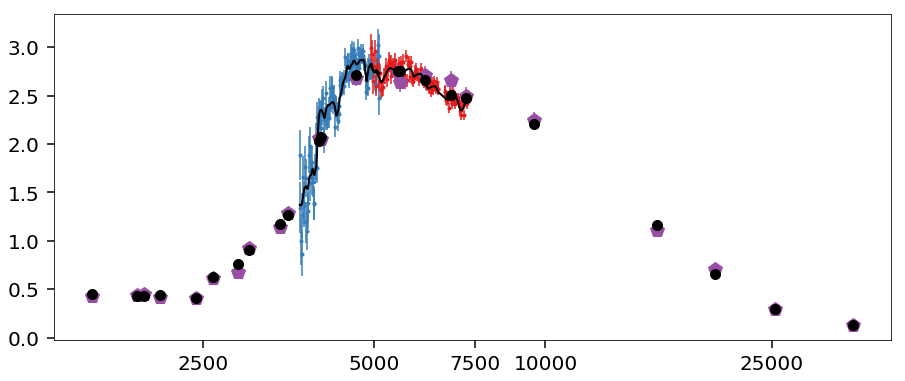

In [25]:
#  array([0.57029166, 3.07055345, 0.35029257, 1.24904928, 0.11330445]))

sp.params['logzsol'] = np.log10(0.57)
sp.params['tau'] = 0.35
sp.params['dust2'] = 0.11
    
wave,flux = sp.get_spectrum(tage = 3.07,peraa = True)
    
Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux , 1.249)

PC= Full_scale(Gs, Pmfl)

Bscale = Scale_model(Gs.SBfl, Gs.SBer, PC*Bmfl)
Rscale = Scale_model(Gs.SRfl, Gs.SRer, PC*Rmfl)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.SBfl*1E18,Gs.SBer*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.SRfl*1E18,Gs.SRer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.SPflx*1E18,Gs.SPerr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

plt.plot(np.log10(Gs.Bwv_rf), PC*Bmfl*1E18, 'k', linewidth=2,zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), PC*Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), PC*Pmfl*1E18, 'ko', zorder=5,ms=10)

In [30]:
sp.params['compute_light_ages'] = True

wave,flux = sp.get_spectrum(tage = 4.2)

print(interp1d(wave,flux)(4770))
sp.params['compute_light_ages'] = False


2.41504855066041


In [23]:
np.where(dres.logl == np.max(dres.logl)),np.max(dres.logl),dres.samples[25931]

((array([25931]),),
 -121.5813122303846,
 array([0.57029166, 3.07055345, 0.35029257, 1.24904928, 0.11330445]))

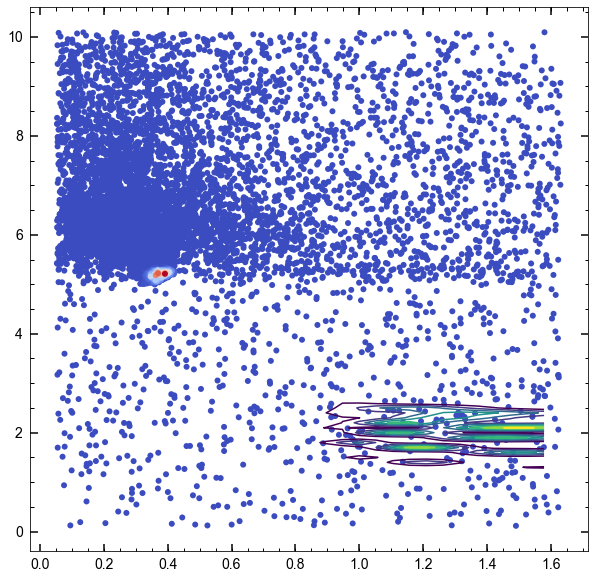

In [13]:
P = np.load('../../Quiescent_analysis/chidat/n21156_dtau_tZ_pos_lwa_dust.npy')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
M,A=np.meshgrid(metal/0.019,age)

plt.figure(figsize=(10, 10))
plt.scatter(dres.samples[:, 0], dres.samples[:, 1],
               marker='o', c=np.exp(dres.logl), linewidths=(0.,), cmap='coolwarm')

# plt.scatter(dres.samples[:, 0][IDX[242]], dres.samples[:, 1][IDX[242]],
#                marker='o', c='k')
plt.contour(M,A,P)


In [21]:
sp.params['compute_light_ages'] = True
lwa = np.zeros(len(dres.samples))
for i in range(len(dres.samples)):
    sp.params['logzsol'] = np.log10(dres.samples[i][0])
    sp.params['tau'] = dres.samples[i][2]
    sp.params['dust2'] = dres.samples[i][4]  
    wave, flux = sp.get_spectrum(tage = dres.samples[i][1])
    
    lwa[i] = interp1d(wave,flux)(4770)


In [40]:
sp.params['compute_light_ages'] = True
lwa2 = np.zeros(len(dres2.samples))
for i in range(len(dres2.samples)):
    sp.params['logzsol'] = np.log10(dres2.samples[i][0])
    sp.params['tau'] = dres2.samples[i][2]
    sp.params['dust2'] = dres2.samples[i][4]  
    wave, flux = sp.get_spectrum(tage = dres2.samples[i][1])
    
    lwa2[i] = interp1d(wave,flux)(4770)

In [38]:
sp.params['logzsol'] = np.log10(1)
sp.params['tau'] = 1
sp.params['dust2'] = 0.1  
wave, flux = sp.get_spectrum(tage = 0.5)
print(interp1d(wave,flux)(4770))

0.0920121117084283


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


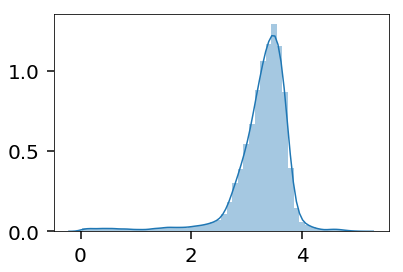

In [139]:
sea.distplot(dres1.samples[:,1])
# sea.distplot(lwa1)
# plt.xlim(0,5)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


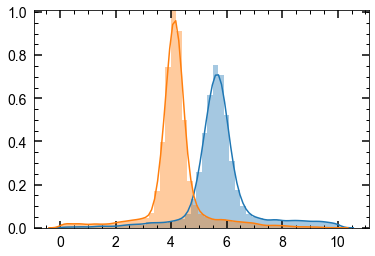

In [22]:
sea.distplot(dres.samples[:,1])
sea.distplot(lwa)

In [43]:
dres1.samples[:,1] = lwa1
dres2.samples[:,1] = lwa2

In [77]:
from dynesty.utils import quantile as _quantile
from scipy.ndimage import gaussian_filter as norm_kde

def Get_posterior(sample,logwt,logz):
    weight = np.exp(logwt - logz[-1])

    q = [0.5 - 0.5 * 0.999999426697, 0.5 + 0.5 * 0.999999426697]
    span = _quantile(sample.T, q, weights=weight)

    s = 0.02

    bins = int(round(10. / 0.02))
    n, b = np.histogram(sample, bins=bins, weights=weight,
                        range=np.sort(span))
    n = norm_kde(n, 10.)
    x0 = 0.5 * (b[1:] + b[:-1])
    y0 = n
    
    return x0, y0

[2.92597421e-05]


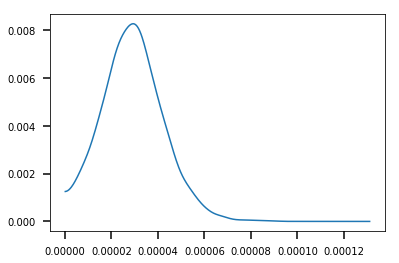

In [99]:
x,PX = Get_posterior(dres2b.samples[:,5], dres2['logwt'], dres2['logz'])

plt.plot(x,PX)
print(x[PX == max(PX)])

In [111]:
in1 = np.loadtxt('/Users/vestrada/alf/atlas_ssp_t03_Zp0.0.abund.krpa.s100').T

In [127]:
sp.params['logzsol'] = np.log10( 1 )
# sp.params['tau'] = 0.1
sp.params['sfh'] = 0

sp.params['dust2'] = 0.0

wave, flux = sp.get_spectrum(tage = 3, peraa = True)

(3.5, 4.5)

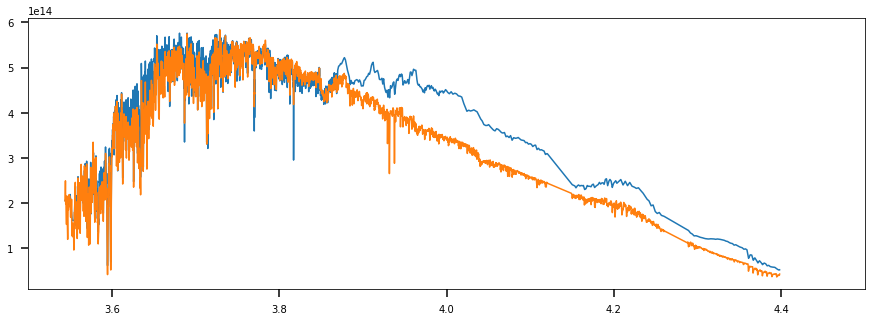

In [132]:
iflux = interp1d(wave,flux)(in1[0])
plt.figure(figsize=[15,5])
# plt.plot(np.log10(wave),flux*1.5E19)
plt.plot(np.log10(in1[0]), iflux*.9E19)
plt.plot(np.log10(in1[0]), (3E18 / in1[0]**2)*in1[1])



plt.xlim(3.5,4.5)

# review all completed cycles

In [31]:
dres1 = np.load('../data/out_dict/GND_21156_testfit_tmp_LF.npy').item()
dres2 = np.load('../data/out_dict/GND_21156_testfit_tmp_EF.npy').item()
dres3 = np.load('../data/out_dict/GND_21156_testfit_tmp_ND.npy').item()
dres4 = np.load('../data/out_dict/GND_21156_testfit_tmp_LF_tab.npy').item()
dres5 = np.load('../data/out_dict/GND_21156_testfit_tmp_EF_tab.npy').item()

dres6 = np.load('../data/out_dict/GND_21156_testfit_LF.npy').item()
dres7 = np.load('../data/out_dict/GND_21156_testfit_EF.npy').item()
dres8 = np.load('../data/out_dict/GND_21156_testfit_ND.npy').item()
dres9 = np.load('../data/out_dict/GND_21156_testfit_LF_tab.npy').item()

dres10 = np.load('../data/out_dict/GND_21156_testfit_EF_tab.npy').item()

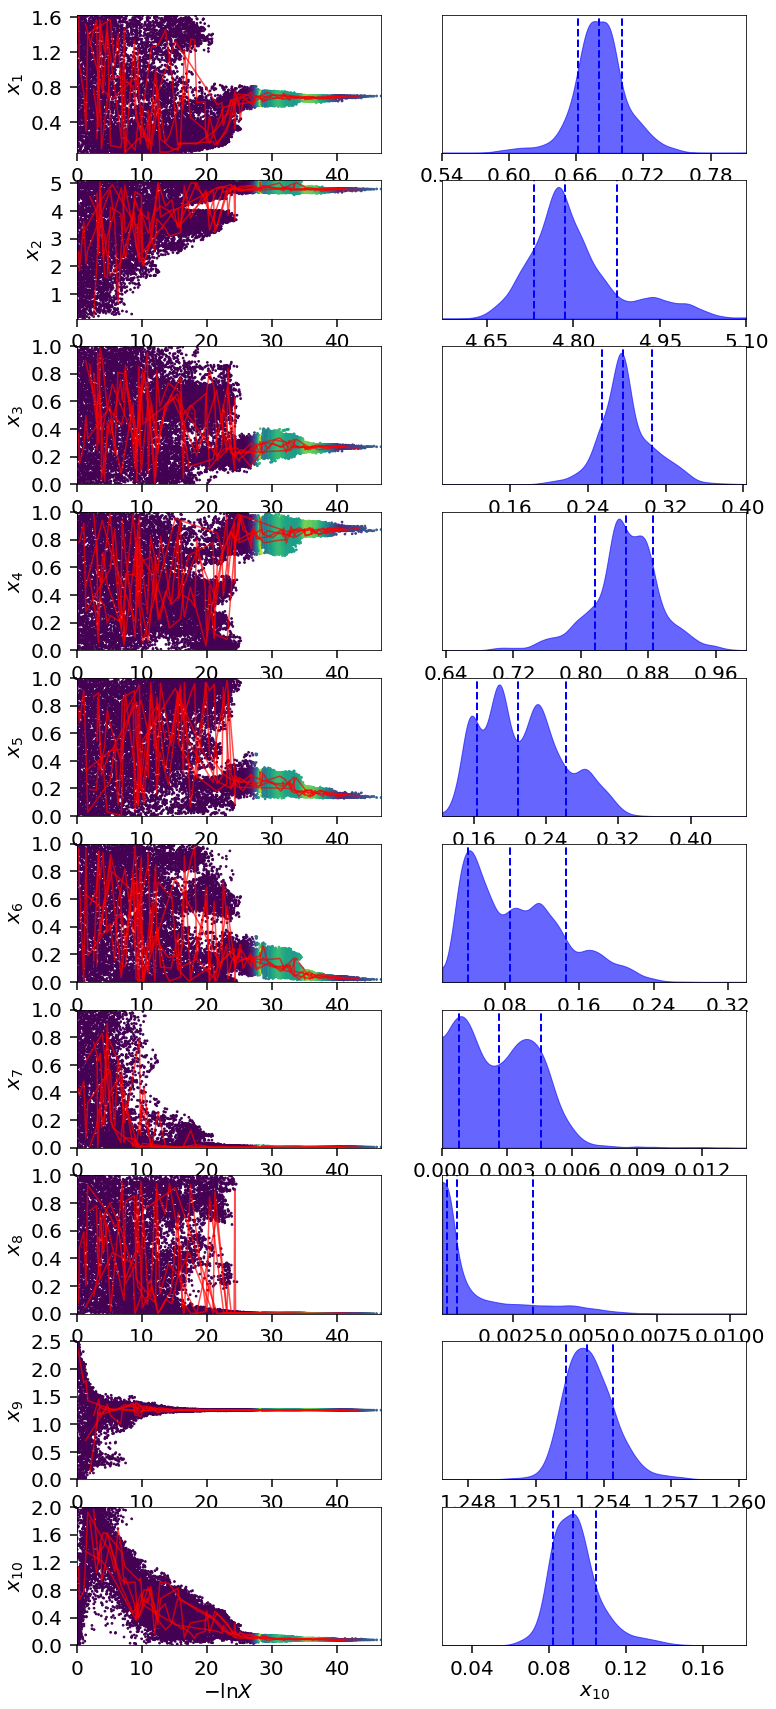

In [34]:
fig, axes = dyplot.traceplot(dres9, truths=None, truth_color='black',
                             show_titles=False, title_kwargs={'fontsize': 5, 'y': 1.05},
                             trace_cmap='viridis', kde=False,
                             connect=True, connect_highlight=range(5))

(<Figure size 1605.6x1605.6 with 100 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a88c549e8>,
       dtype=object))

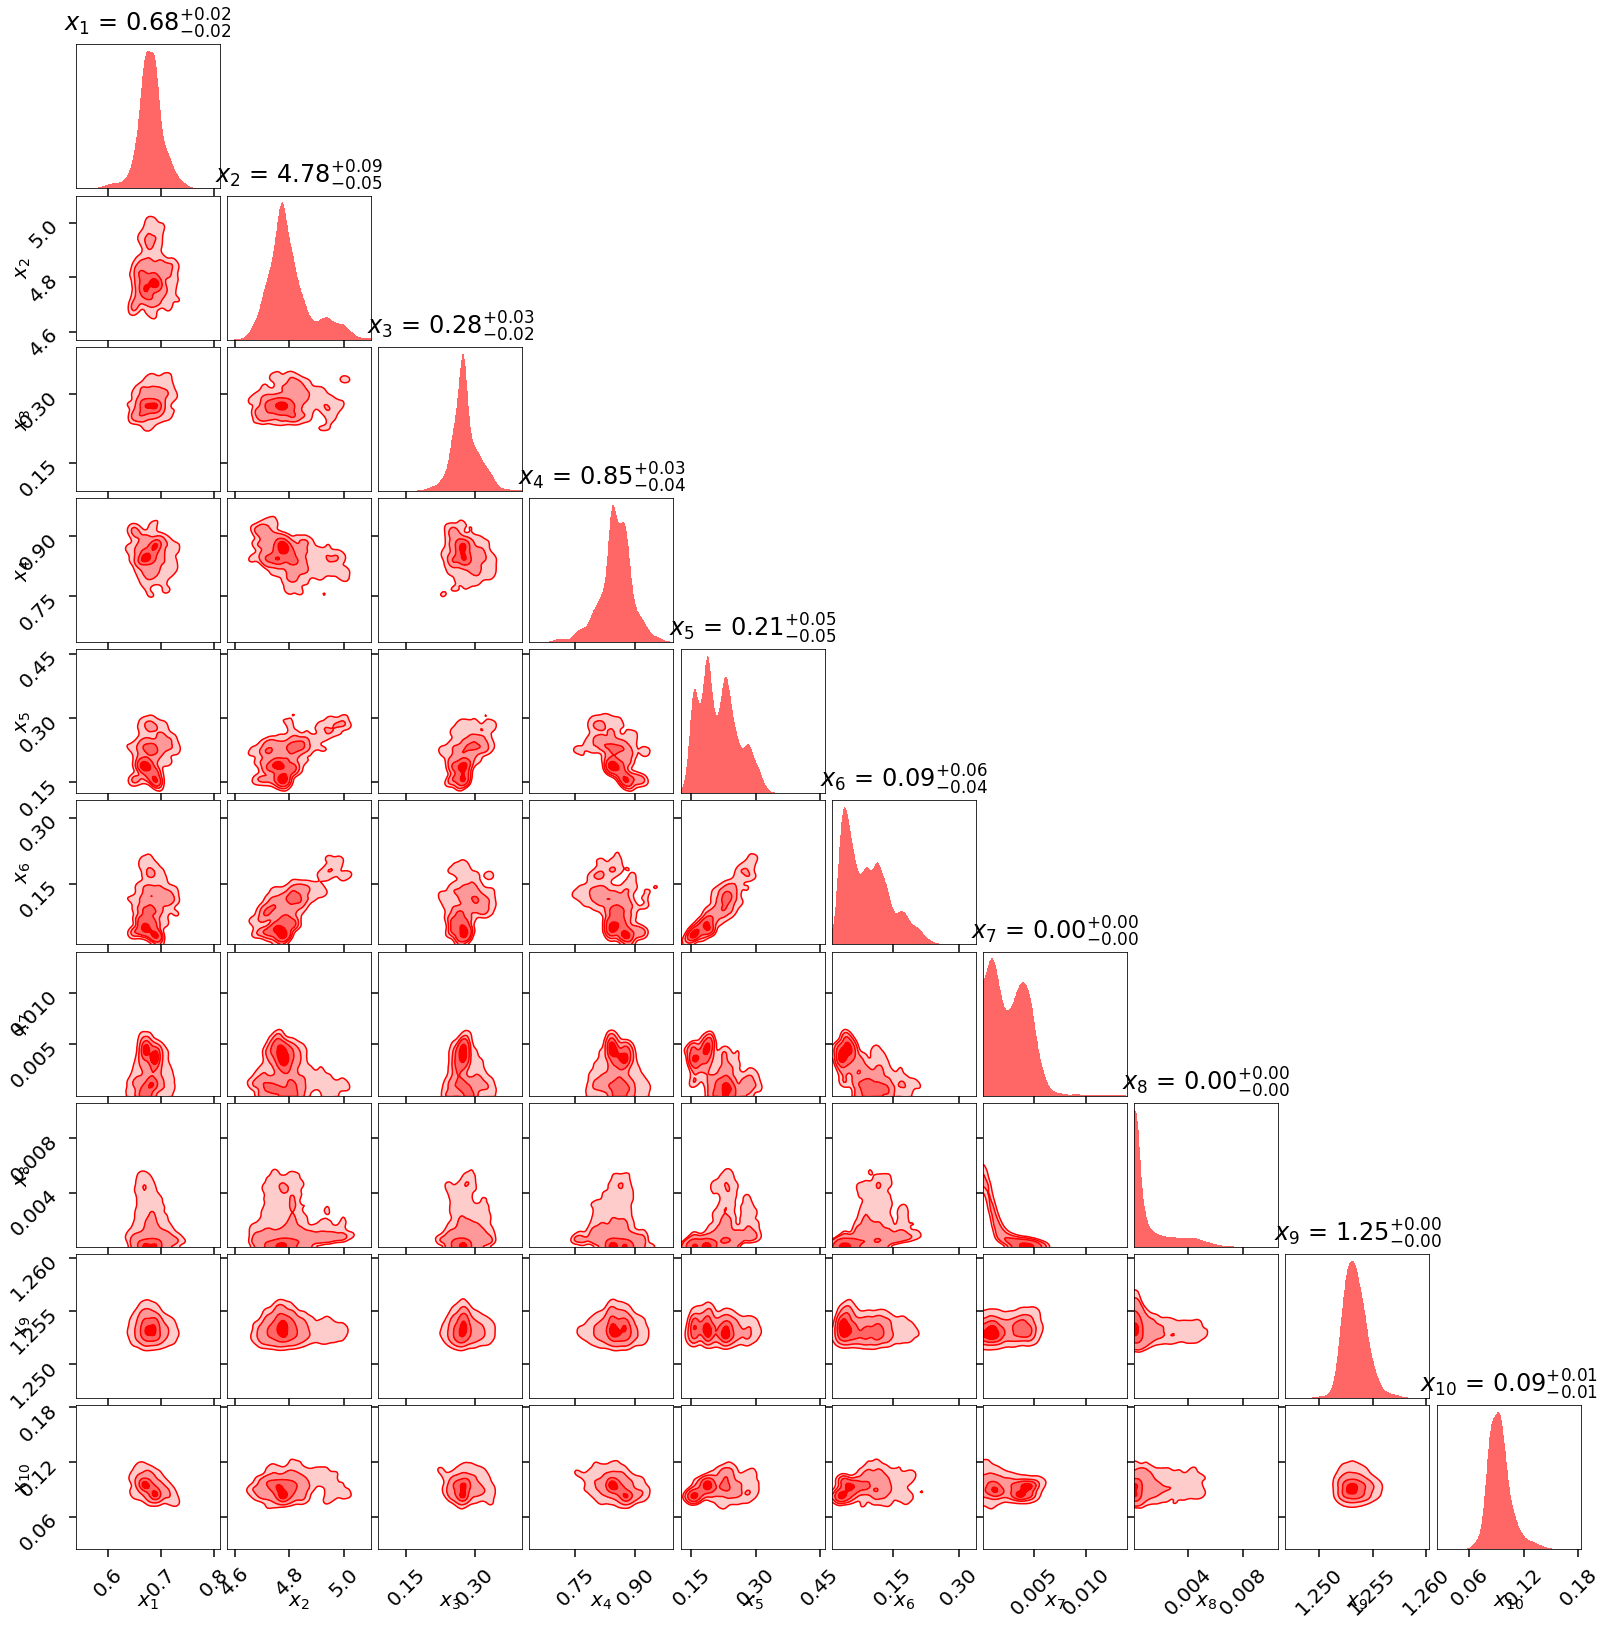

In [35]:
dyplot.cornerplot(dres9, color='red', truths=None, truth_color='black',#labels = ['Z','t','$\\tau$','z','Av'],
                           show_titles=True, title_kwargs={'y': 1.05}, 
                           quantiles=None, max_n_ticks=3, )

<ErrorbarContainer object of 3 artists>

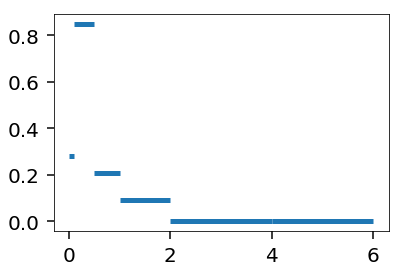

In [36]:
plt.errorbar(np.array([0.1, 0.5, 1, 2, 4, 6]),np.array([0.28,  0.85, 0.21,
         0.09 ,  0.00,  0.0]),xerr = [[0.1,0.4,0.5,1,2,2],[0,0,0,0,0,0]],fmt = 'o',ms=0,linewidth=5)

In [33]:
np.where(dres1.logl == np.max(dres1.logl)),np.max(dres1.logl),dres1.samples[26460]

((array([26460]),),
 -93.11404487774317,
 array([0.32468948, 4.83708409, 0.49859328, 1.25364188, 0.20821861]))

In [35]:
np.where(dres6.logl == np.max(dres6.logl)),np.max(dres6.logl),dres6.samples[28730]

((array([28730]),),
 -212.87524121550115,
 array([0.6280001 , 5.09097778, 0.54372305, 1.25261409, 0.08475945]))

In [41]:
np.where(dres7.logl == np.max(dres7.logl)),np.max(dres7.logl),dres7.samples[28603]

((array([28603]),),
 -211.80592481091657,
 array([0.60347418, 5.68625517, 0.61053635, 1.25292823, 0.07791594]))

In [38]:
np.where(dres9.logl == np.max(dres9.logl)),np.max(dres9.logl),dres9.samples[32110]

((array([32110]),),
 -212.07630523308626,
 array([7.01082532e-01, 4.78812212e+00, 2.72526675e-01, 8.73381849e-01,
        1.34358664e-01, 1.78666045e-02, 5.39302455e-03, 1.37082047e-04,
        1.25280924e+00, 7.94224483e-02]))

In [69]:
np.where(dres10.logl == np.max(dres10.logl)),np.max(dres10.logl),dres10.samples[27588]

((array([27588]),),
 -205.36900949085887,
 array([ 0.64668916, 10.09676873,  0.30959742,  0.9492099 ,  0.88531001,
         0.6769806 ,  0.81779508,  0.14122372,  0.04172833,  1.25335991,
         0.10707565]))

432.4787478296225


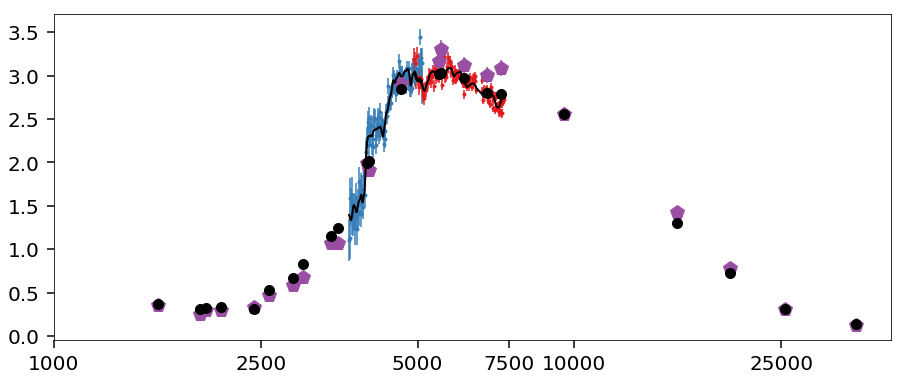

In [64]:
Gs.Sim_all(0.012/0.019, 4.93, 0.545, 1.2529, 0.06)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18, Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18, Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), Gs.Bmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), Gs.Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), Gs.Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

Bchi = np.sum(((((Gs.Bfl) - Gs.Bmfl) / (Gs.Ber))**2))
Rchi = np.sum(((((Gs.Rfl) - Gs.Rmfl) / (Gs.Rer))**2))
Pchi = np.sum((((Gs.Pflx - Gs.Pmfl) / Gs.Perr)**2))
print(Bchi + Rchi + Pchi)

442.4641927282162


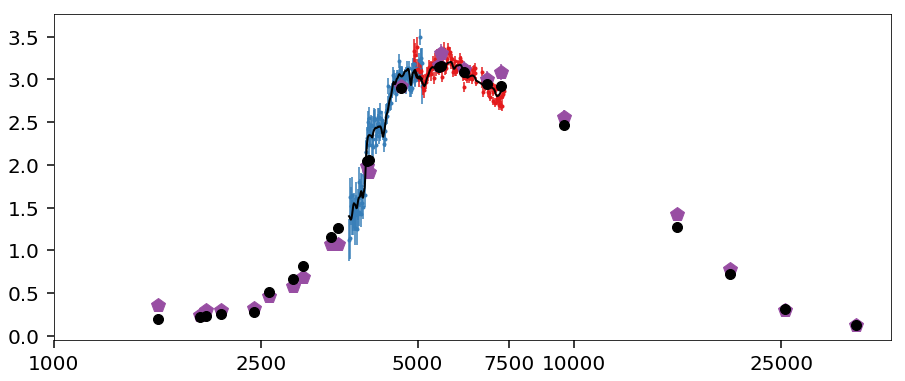

In [65]:
Gs.Sim_all(0.32468948, 4.83708409, 0.49859328, 1.25364188, 0.20821861)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18, Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18, Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), Gs.Bmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), Gs.Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), Gs.Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

Bchi = np.sum(((((Gs.Bfl) - Gs.Bmfl) / (Gs.Ber))**2))
Rchi = np.sum(((((Gs.Rfl) - Gs.Rmfl) / (Gs.Rer))**2))
Pchi = np.sum((((Gs.Pflx - Gs.Pmfl) / Gs.Perr)**2))
print(Bchi + Rchi + Pchi)

416.6229833301954


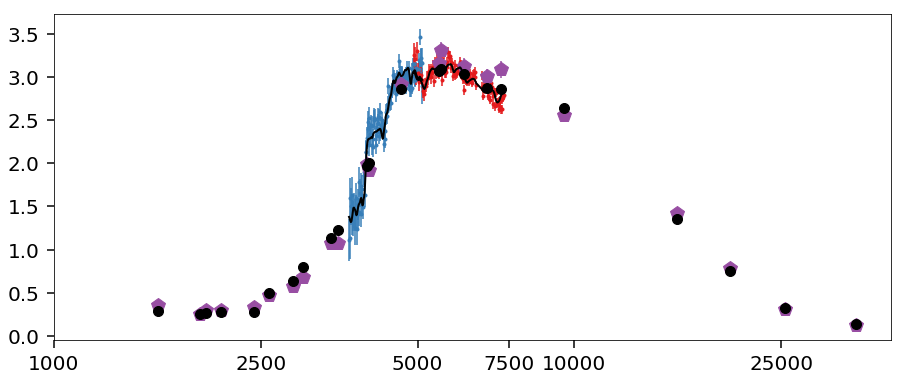

In [66]:
Gs.Sim_all(0.6280001 , 5.09097778, 0.54372305, 1.25261409, 0.08475945)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18, Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18, Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), Gs.Bmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), Gs.Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), Gs.Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

Bchi = np.sum(((((Gs.Bfl) - Gs.Bmfl) / (Gs.Ber))**2))
Rchi = np.sum(((((Gs.Rfl) - Gs.Rmfl) / (Gs.Rer))**2))
Pchi = np.sum((((Gs.Pflx - Gs.Pmfl) / Gs.Perr)**2))
print(Bchi + Rchi + Pchi)

416.9092782718844


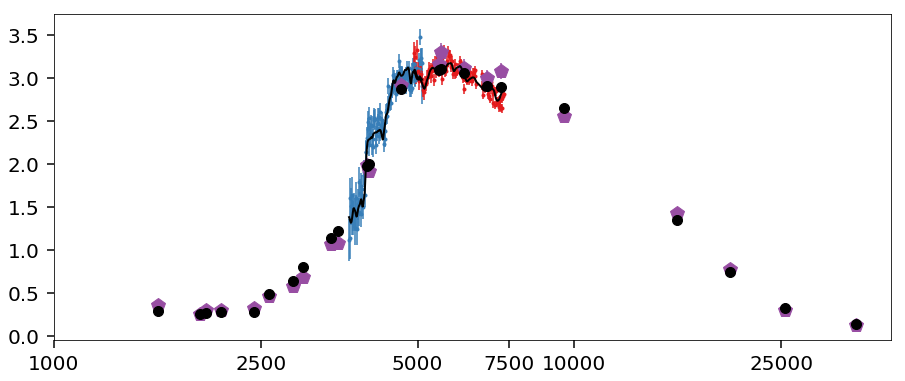

In [67]:
Gs.Sim_all(0.60347418, 5.68625517, 0.61053635, 1.25292823, 0.07791594)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18, Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18, Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), Gs.Bmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), Gs.Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), Gs.Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

Bchi = np.sum(((((Gs.Bfl) - Gs.Bmfl) / (Gs.Ber))**2))
Rchi = np.sum(((((Gs.Rfl) - Gs.Rmfl) / (Gs.Rer))**2))
Pchi = np.sum((((Gs.Pflx - Gs.Pmfl) / Gs.Perr)**2))
print(Bchi + Rchi + Pchi)

In [39]:
0.2725, 0.8734, 0.1344, 0.0179, 0.0054, 0.0001,


sp.params['sfh'] = 3
sp.params['logzsol'] = np.log10( 0.70108)
sp.params['dust2'] = 0.079
sp.set_tabular_sfh(np.array([0.1, 0.5, 1, 2, 4, 6]),np.array([0.2725, 0.8734, 0.1344, 0.0179, 0.0054, 0.0001]))

wave,flux = sp.get_spectrum(tage = 4.788,peraa=True)
sp.params['sfh'] = 4

cleaned


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


347.37621271091797


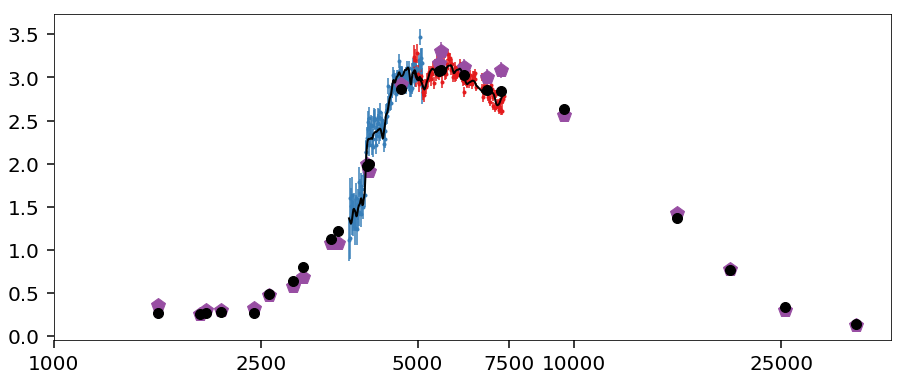

In [47]:
Gs = Gen_spec('GND', 21156, 1.25378,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500],mdl_err = False, instr_err = False,
            phot_errterm = 0.03, decontam = True) 

Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux , 1.25280924)

PC= Scale_model(Gs.Pflx,Gs.Perr,Pmfl)

Bscale = Scale_model(Gs.Bfl, Gs.Ber, PC*Bmfl)
Rscale = Scale_model(Gs.Rfl, Gs.Rer, PC*Rmfl)

Bchi= np.sum(( (Gs.Bfl / Bscale - PC*Bmfl) / Gs.Ber/ Bscale)**2) 
Rchi= np.sum(( (Gs.Rfl / Rscale - PC*Rmfl) / Gs.Rer/ Rscale)**2) 
Pchi= np.sum(( (Gs.Pflx - PC*Pmfl) / Gs.Perr)**2) 

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18 / Bscale,Gs.Ber*1E18/ Bscale,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18/ Rscale,Gs.Rer*1E18/ Rscale,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), PC*Bmfl*1E18, 'k', linewidth=2,zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), PC*Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), PC*Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])
print(Bchi + Rchi + Pchi)

In [75]:
sp.params['sfh'] = 3
sp.params['logzsol'] = np.log10( 0.64668916)
sp.params['dust2'] = 0.107
sp.set_tabular_sfh(np.array([0.1, 0.5, 1, 2, 4, 7,10]),np.array([0.30959742,  0.9492099 ,  0.88531001,
         0.6769806 ,  0.81779508,  0.14122372,  0.04172833]))

wave,flux = sp.get_spectrum(tage = 10.09676873,peraa=True)
sp.params['sfh'] = 4


cleaned


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


394.8233423678303


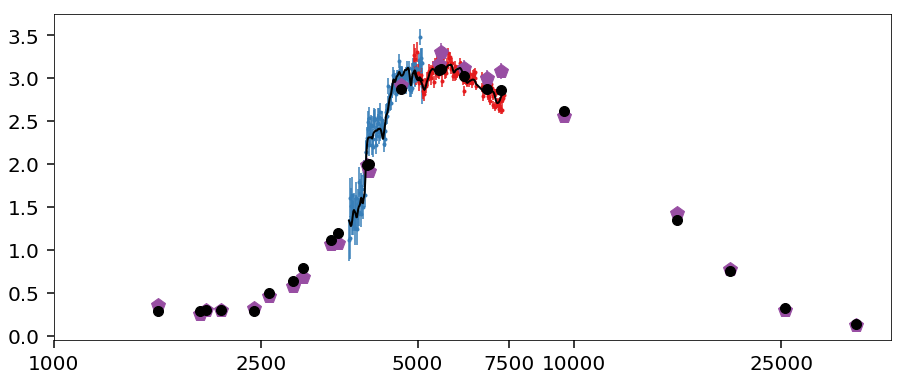

In [93]:
Gs = Gen_spec('GND', 21156, 1.25378,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500],mdl_err = False, instr_err = False,
            phot_errterm = 0.03, decontam = True) 

Bmfl, Rmfl, Pmfl = Full_forward_model(Gs, wave, flux , 1.25335991)

PC= Full_scale(Gs, Pmfl)

Bscale = Scale_model(Gs.Bfl, Gs.Ber, PC*Bmfl)
Rscale = Scale_model(Gs.Rfl, Gs.Rer, PC*Rmfl)

Bchi, Rchi, Pchi = Full_fit(Gs, PC * Bmfl, PC * Rmfl, PC * Pmfl)

plt.figure(figsize = [15,6])
plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18 / Bscale,Gs.Ber*1E18/ Bscale,
                linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18/ Rscale,Gs.Rer*1E18/ Rscale,
                linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='p', markersize=15, color='#984ea3')
plt.plot(np.log10(Gs.Bwv_rf), PC*Bmfl*1E18, 'k', linewidth=2,zorder=5)
plt.plot(np.log10(Gs.Rwv_rf), PC*Rmfl*1E18, 'k',linewidth=2, zorder=5)
plt.plot(np.log10(Gs.Pwv_rf), PC*Pmfl*1E18, 'ko', zorder=5,ms=10)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])
print(Bchi + Rchi + Pchi)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


([<matplotlib.axis.XTick at 0x1a7bff2cc0>,
 <a list of 6 Text xticklabel objects>)

<Figure size 1080x432 with 0 Axes>

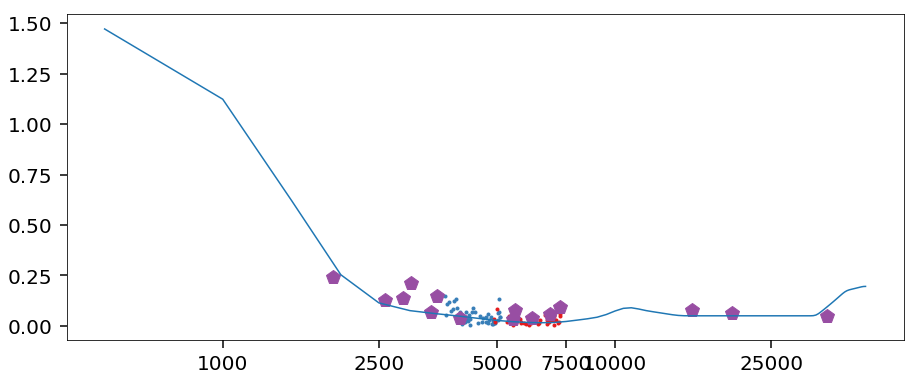

In [98]:
Gs.Sim_all(0.012/0.019, 4.93, 0.545, 1.2529, 0.06)
plt.figure(figsize = [15,6])
plt.figure(figsize = [15,6])
plt.plot(np.log10(Gs.Bwv_rf),np.sqrt(((Gs.Bfl - Gs.Bmfl) / Gs.Bfl)**2 - (Gs.Ber / Gs.Bfl)**2), 
                'o', markersize=3, color='#377eb8')
plt.plot(np.log10(Gs.Rwv_rf),np.sqrt(((Gs.Rfl - Gs.Rmfl) / Gs.Rfl)**2 - (Gs.Rer / Gs.Rfl)**2), 
                'o', markersize=3, color='#e41a1c')
plt.plot(np.log10(Gs.Pwv_rf),np.sqrt(((Gs.Pflx- Gs.Pmfl) / Gs.Pflx)**2 - (Gs.Perr / Gs.Pflx)**2),
                'p', markersize=15, color='#984ea3')
plt.plot(np.log10(wv),tmp)

plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


([<matplotlib.axis.XTick at 0x1a919d2b00>,
 <a list of 6 Text xticklabel objects>)

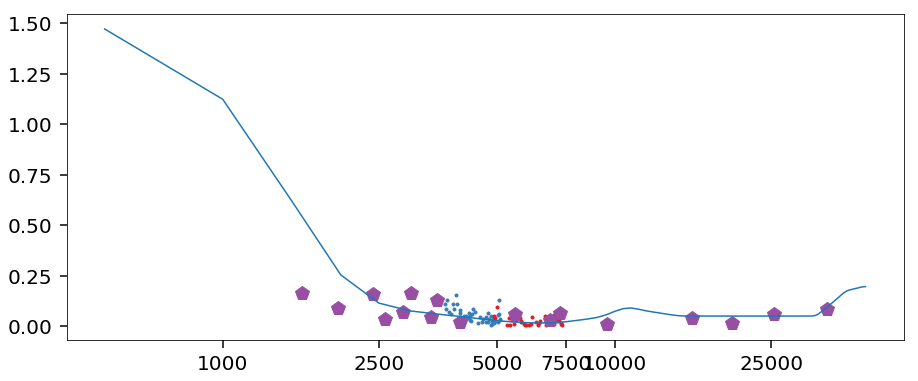

In [49]:
Gs.Sim_all(0.6280001 , 5.09097778, 0.54372305, 1.25261409, 0.08475945)
plt.figure(figsize = [15,6])
plt.plot(np.log10(Gs.Bwv_rf),np.sqrt(((Gs.Bfl - Gs.Bmfl) / Gs.Bfl)**2 - (Gs.Ber / Gs.Bfl)**2), 
                'o', markersize=3, color='#377eb8')
plt.plot(np.log10(Gs.Rwv_rf),np.sqrt(((Gs.Rfl - Gs.Rmfl) / Gs.Rfl)**2 - (Gs.Rer / Gs.Rfl)**2), 
                'o', markersize=3, color='#e41a1c')
plt.plot(np.log10(Gs.Pwv_rf),np.sqrt(((Gs.Pflx- Gs.Pmfl) / Gs.Pflx)**2 - (Gs.Perr / Gs.Pflx)**2),
                'p', markersize=15, color='#984ea3')
plt.plot(np.log10(wv),tmp)

plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


([<matplotlib.axis.XTick at 0x1a912b0438>,
 <a list of 6 Text xticklabel objects>)

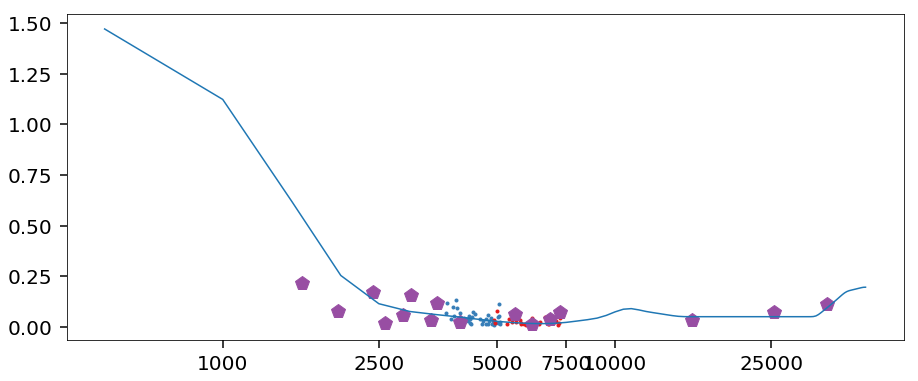

In [48]:
wv,tmp = np.load('../templates/mdl_EF.npy')
plt.figure(figsize = [15,6])
plt.plot(np.log10(Gs.Bwv_rf),np.sqrt(((Gs.Bfl/ Bscale - PC*Bmfl) / Gs.Bfl/ Bscale)**2 - (Gs.Ber / Gs.Bfl)**2), 
                'o', markersize=3, color='#377eb8')
plt.plot(np.log10(Gs.Rwv_rf),np.sqrt(((Gs.Rfl / Rscale- PC*Rmfl) / Gs.Rfl/ Rscale)**2 - (Gs.Rer / Gs.Rfl)**2), 
                'o', markersize=3, color='#e41a1c')
plt.plot(np.log10(Gs.Pwv_rf),np.sqrt(((Gs.Pflx- PC*Pmfl) / Gs.Pflx)**2 - (Gs.Perr / Gs.Pflx)**2),
                'p', markersize=15, color='#984ea3')
plt.plot(np.log10(wv),tmp)
plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

([<matplotlib.axis.XTick at 0x1a8e753dd8>,
 <a list of 6 Text xticklabel objects>)

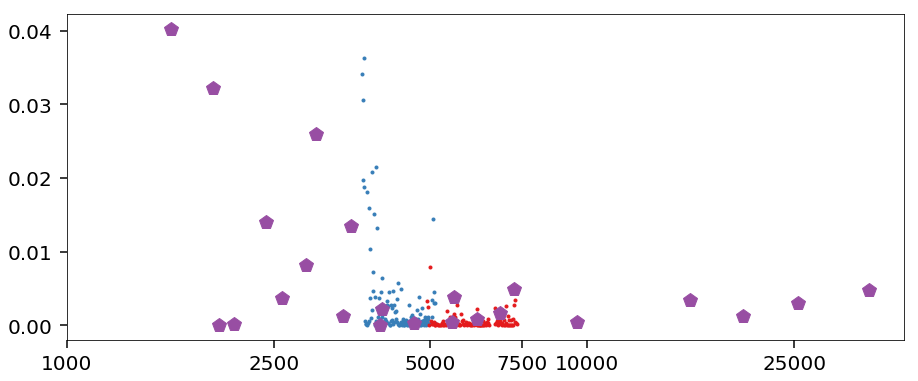

In [95]:
plt.figure(figsize = [15,6])
plt.plot(np.log10(Gs.Bwv_rf),((Gs.Bfl/ Bscale - PC*Bmfl) / Gs.Bfl/ Bscale)**2 , 
                'o', markersize=3, color='#377eb8')
plt.plot(np.log10(Gs.Rwv_rf),((Gs.Rfl / Rscale- PC*Rmfl) / Gs.Rfl/ Rscale)**2 , 
                'o', markersize=3, color='#e41a1c')
plt.plot(np.log10(Gs.Pwv_rf),((Gs.Pflx- PC*Pmfl) / Gs.Pflx)**2 ,
                'p', markersize=15, color='#984ea3')

# plt.plot(np.log10(Gs.Bwv_rf),((Gs.Bfl - Gs.Bmfl) / Gs.Bfl)**2, 
#                 'o', markersize=3, color='k')
# plt.plot(np.log10(Gs.Rwv_rf),((Gs.Rfl - Gs.Rmfl) / Gs.Rfl)**2, 
#                 'o', markersize=3, color='k')
# plt.plot(np.log10(Gs.Pwv_rf),((Gs.Pflx- Gs.Pmfl) / Gs.Pflx)**2,
#                 'p', markersize=15, color='k')

plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])

In [ ]:
asdf